# Insurance Claims - Fraud Detection Project

# Problem Statement:
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem

We have to build a predictive model that which can predict an insurance claim is fraud or not

In [1]:
#Importing libraries as required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading CSV file
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

Dataset consists of 1000 rows and 40 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

17 features are numerical and 21 are categorical

Our target variable is categorical.

In [5]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Policy number and incident location are unique features and will not have any impact hence we will drop that columns

In [6]:
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [7]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [8]:
df.replace('?',inplace=True)

months_as_customer             None
age                            None
policy_bind_date               None
policy_state                   None
policy_csl                     None
policy_deductable              None
policy_annual_premium          None
umbrella_limit                 None
insured_zip                    None
insured_sex                    None
insured_education_level        None
insured_occupation             None
insured_hobbies                None
insured_relationship           None
capital-gains                  None
capital-loss                   None
incident_date                  None
incident_type                  None
collision_type                 None
incident_severity              None
authorities_contacted          None
incident_state                 None
incident_city                  None
incident_hour_of_the_day       None
number_of_vehicles_involved    None
property_damage                None
bodily_injuries                None
witnesses                   

In [9]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,YES,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,YES,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,YES,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [10]:
#checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                   

"_c39" has 1000 null values,means there is o data available hence we will drop the same.

In [11]:
df.drop(['_c39'],axis=1,inplace=True)

Lets fill the null values for collision type.

In [12]:
df.collision_type.unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

We will use mode method to fill this Nan values

In [13]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [14]:
df.property_damage.unique()

array(['YES', 'NO'], dtype=object)

we will use the mode method to replace the Nan value.

In [15]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [16]:
df.police_report_available.unique()

array(['YES', 'NO'], dtype=object)

In [17]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [18]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

We have cleared null values in the dataset

In [19]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [20]:
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Day'] = df['policy_bind_date'].dt.day
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [21]:
df.drop(['policy_bind_date'],axis=1,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [22]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Month,Year,Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,6.559000,2001.604000,15.448000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,3.391758,7.360391,8.850176
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1990.000000,1.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,4.000000,1995.000000,8.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,7.000000,2002.000000,16.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,9.000000,2008.000000,23.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,12.000000,2015.000000,31.000000


Data is from the year 1990 to 2015

Vehicle claim : Minimum 70 Claims and Maximum is 79560
    
Age: Minimum age of the customer is 19years and max is 64years
    
Customer who has claimed insurance is maximum 479 months

Minimum claim amount given is 100 and maximum is 114920

Witnesses : Minimum of 1 witnesses and maximum 3.


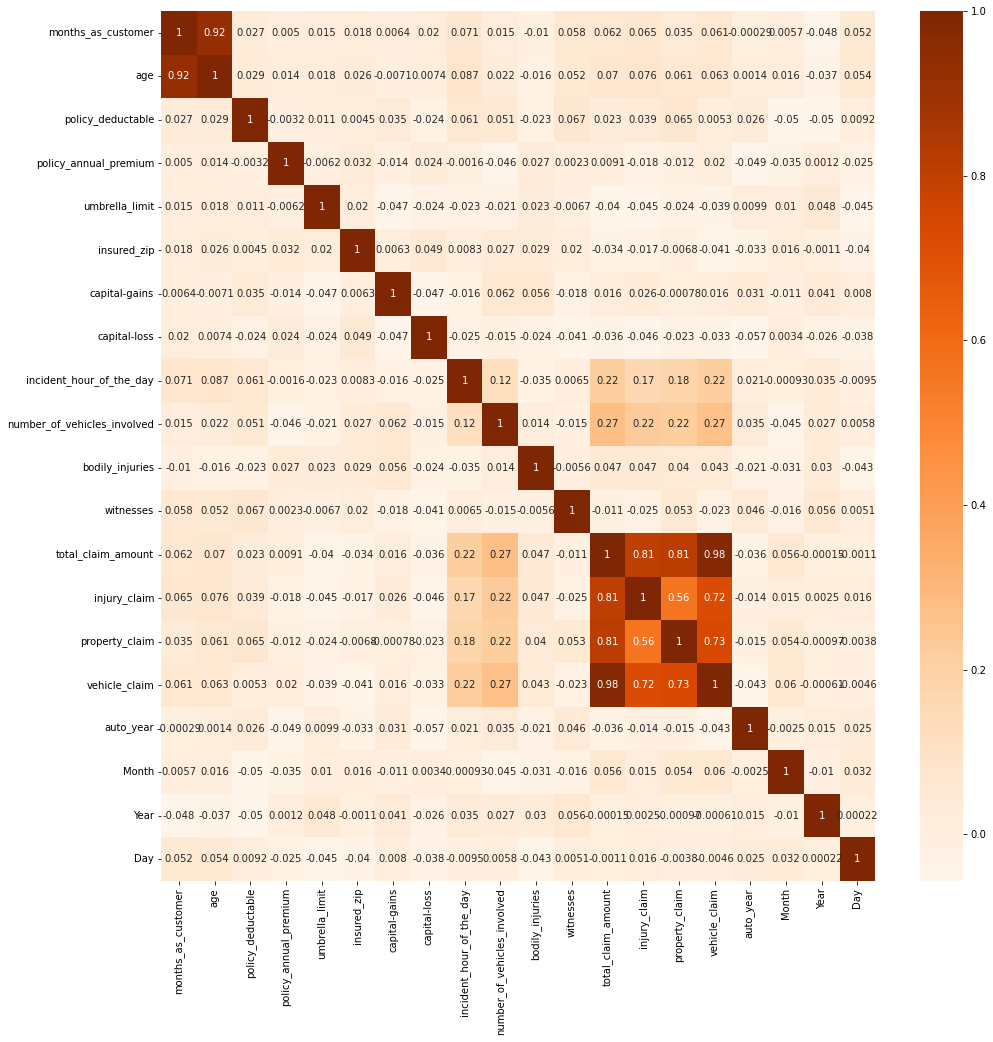

In [23]:
#checking coorelation
cor=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(cor, annot=True, cmap='Oranges')
plt.show()

"Total_claim_amount", "injury_claim", "property_claim" and "Vehicle_claim" are highly corelated

<AxesSubplot:ylabel='fraud_reported'>

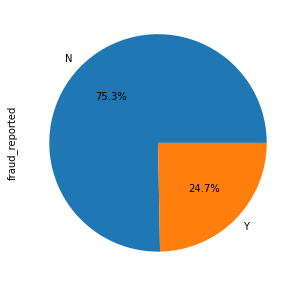

In [24]:
df['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

This chart clearly shows that Morethan 24% of claims were found as fraud.

<AxesSubplot:ylabel='police_report_available'>

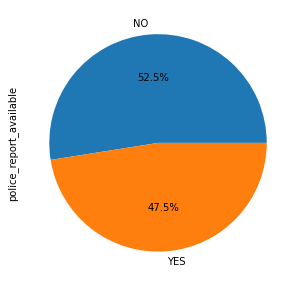

In [25]:
df['police_report_available'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

This chart shows that 47.5% of the cases Police report is available.

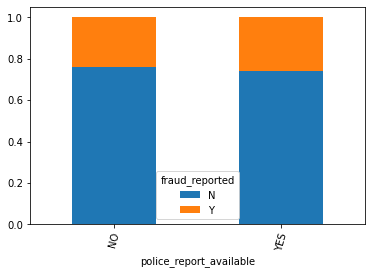

In [26]:
ct = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

This chart clearly shows that there are many cases where police report is not avaiable and it increase the chances of fraud.

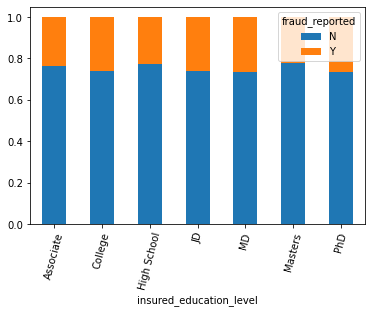

In [27]:
ct = pd.crosstab(df.insured_education_level, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There is not much relation between insured education level and person doing fraud.

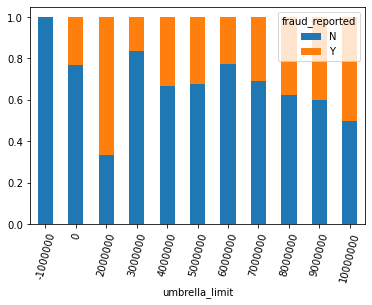

In [28]:
ct = pd.crosstab(df.umbrella_limit , df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

we can see having umbrella unit of 2000000 increases the chance of Insurance fraud.

<AxesSubplot:ylabel='insured_sex'>

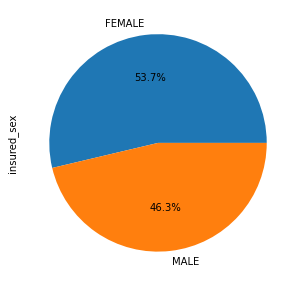

In [29]:
df['insured_sex'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

53.7% cases reported for claim are of females

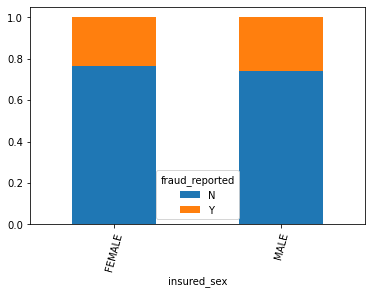

In [30]:
ct = pd.crosstab(df.insured_sex, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Sex has no relation with the Fraud.

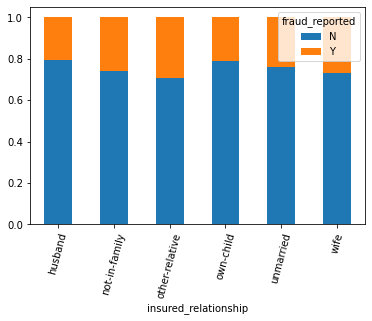

In [31]:
ct = pd.crosstab(df.insured_relationship, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Insured_relationship with 'other-relative' in this chart has higher chance of fraud.

<AxesSubplot:ylabel='insured_hobbies'>

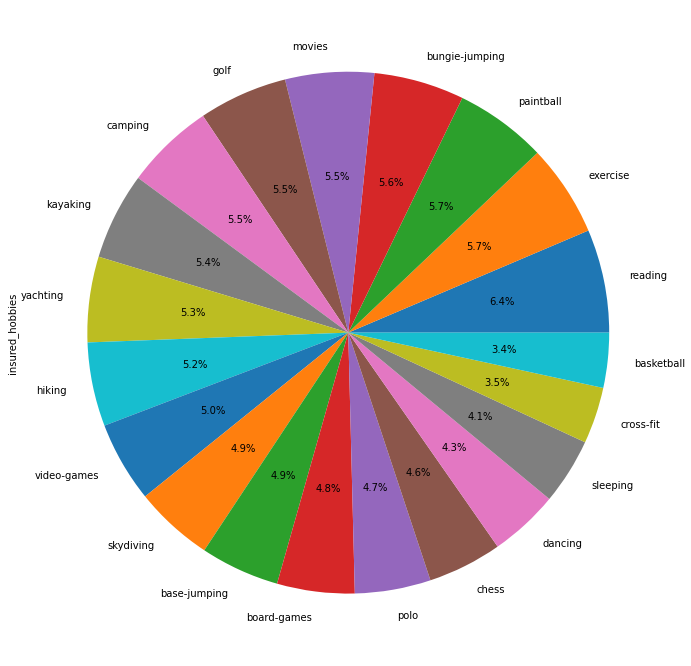

In [32]:
df['insured_hobbies'].value_counts().plot.pie(figsize = (12,12), autopct = '%.1f%%')

Most of the claimers has the reading as hobby while few has basketball.

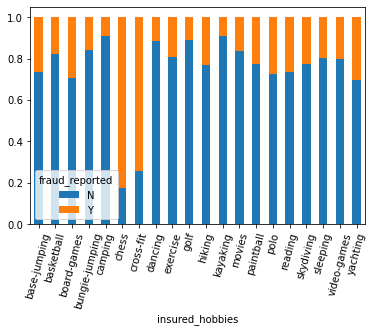

In [33]:
ct = pd.crosstab(df.insured_hobbies, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Customers who play Chess and crossfit as hobbies are most likely claiming is fraud.

<AxesSubplot:ylabel='incident_type'>

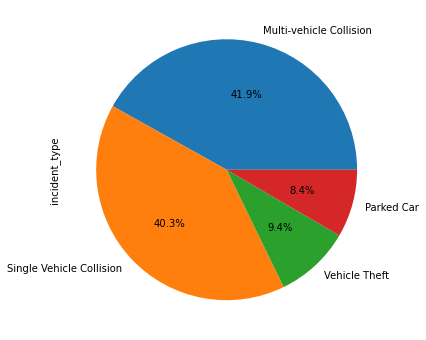

In [34]:
df['incident_type'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

this cleary shows that 41.9% and 40.3% of the claims reproted are of Multiple and Single vehicle collission.

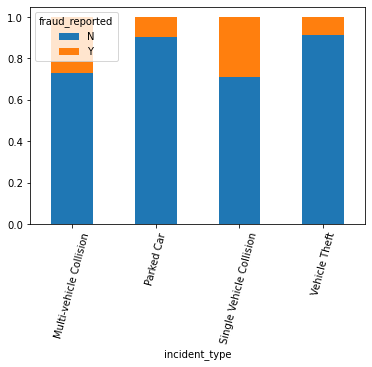

In [35]:
ct = pd.crosstab(df.incident_type, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Single Vehicle collission claim fraud is more and Incident type of Parked car and vehicle theft has less chance that the claim is fraud.

<AxesSubplot:ylabel='authorities_contacted'>

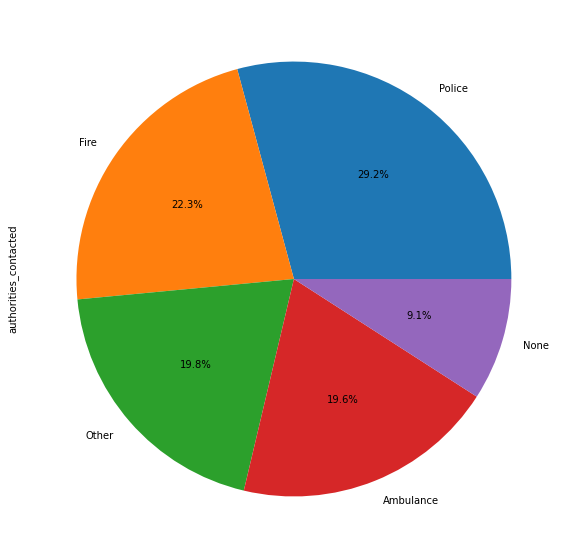

In [36]:
df['authorities_contacted'].value_counts().plot.pie(figsize = (10,10), autopct = '%.1f%%')

This clearly shows that 29.2% of the claimers have contacted police. Only 9.1% have not contacted authorities.

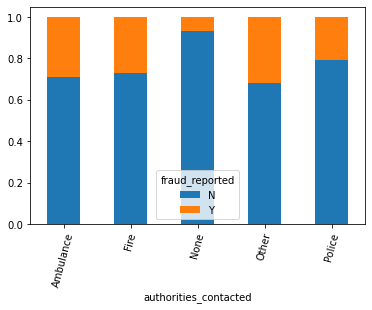

In [37]:
ct = pd.crosstab(df.authorities_contacted, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of Fraud claim is less if None of the authorities are contacted. It inrease if 'Other' is the category of authorities.

<AxesSubplot:ylabel='witnesses'>

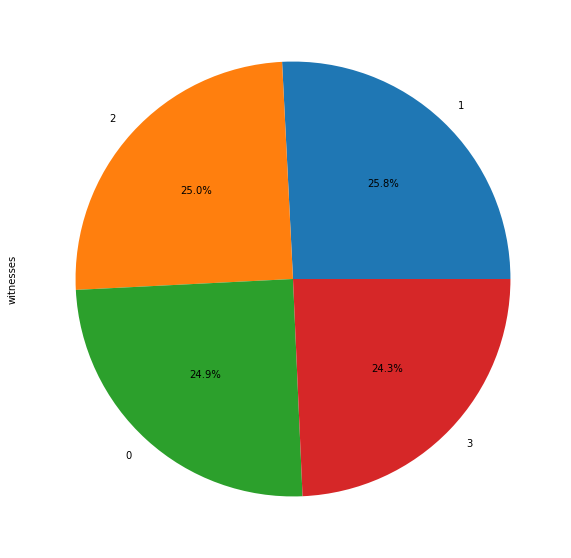

In [38]:
df['witnesses'].value_counts().plot.pie(figsize = (10,10), autopct = '%.1f%%')

Almost witnesses are equally distributed

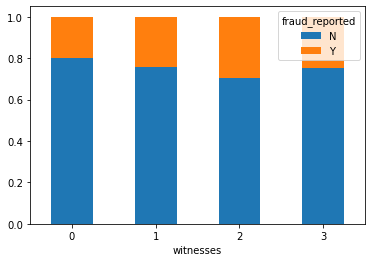

In [39]:
ct = pd.crosstab(df.witnesses, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

Fraud claim is likely if witnesses are 2

<AxesSubplot:ylabel='incident_state'>

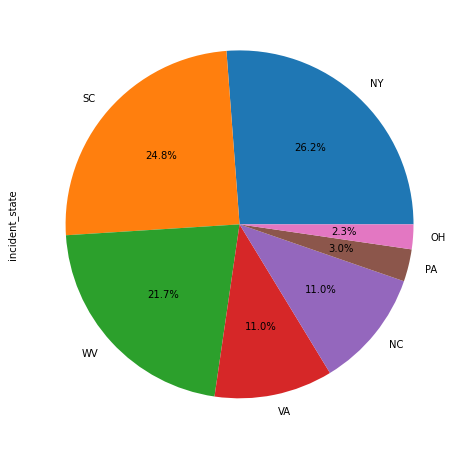

In [40]:
df['incident_state'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Majority of the reported Claims are from these states,such as NY, SC and WV followed by VA,NC and others

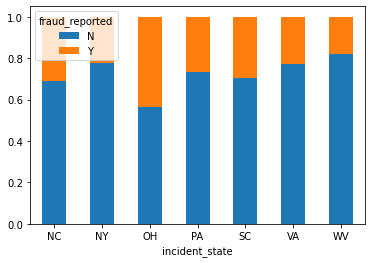

In [41]:
ct = pd.crosstab(df.incident_state, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

OH,NC and SC States claims are higher in fraud where as NY and WV have least chance that the claim is fraud

<AxesSubplot:ylabel='incident_city'>

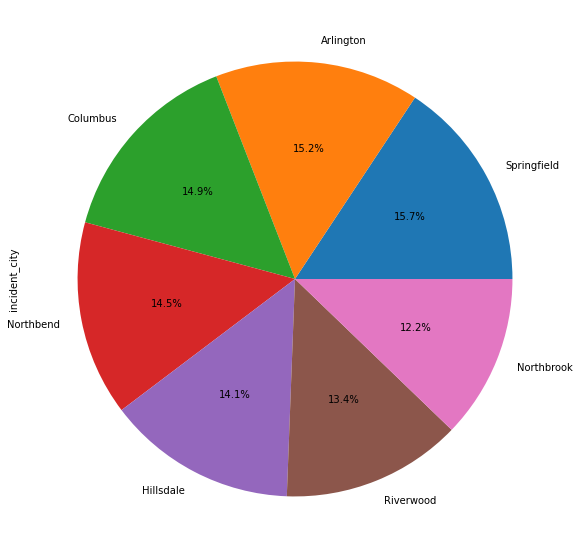

In [42]:
df['incident_city'].value_counts().plot.pie(figsize = (10,10), autopct = '%.1f%%')

Majority of the claims are reported were from Springfiled and Arlington cities

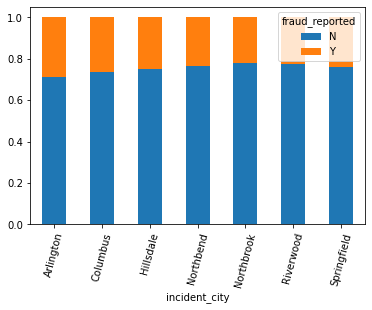

In [43]:
ct = pd.crosstab(df.incident_city, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of fraud claim is likely in Arlington and Columbus cities

<AxesSubplot:ylabel='Month'>

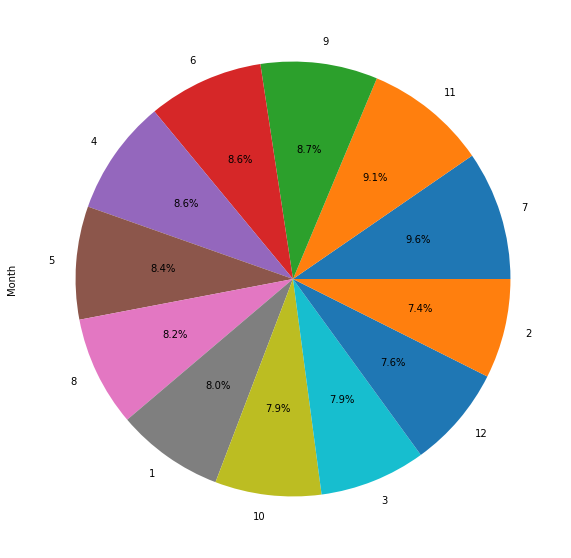

In [44]:
df['Month'].value_counts().plot.pie(figsize = (10,10), autopct = '%.1f%%')

Most of the incidents were reported in september with 8.7%,and April,May June month with 8.6% nd least cases are reported in Feb with 7.4%

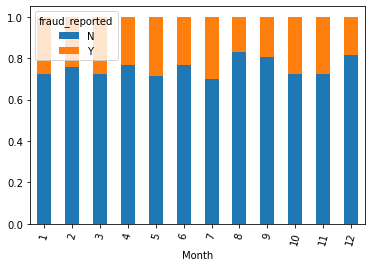

In [45]:
ct = pd.crosstab(df.Month, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There is no such strong relation between months and fraud claim. However Dec months is more likely to have less fraud claims.

# Lets plot the histogram and see the relations

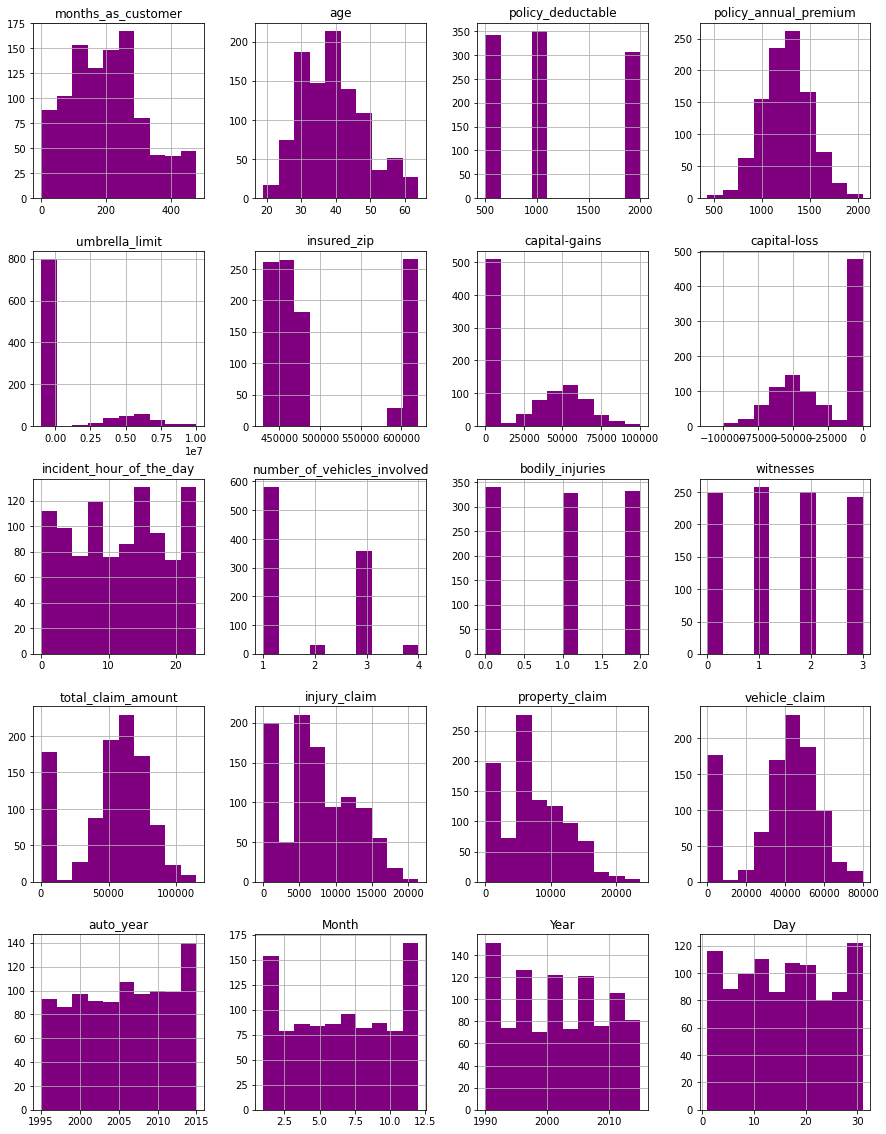

In [46]:
df.hist(figsize=(15,20),color = 'purple');

Most of the data is normally distributed.

Let's check for outliers and skewness

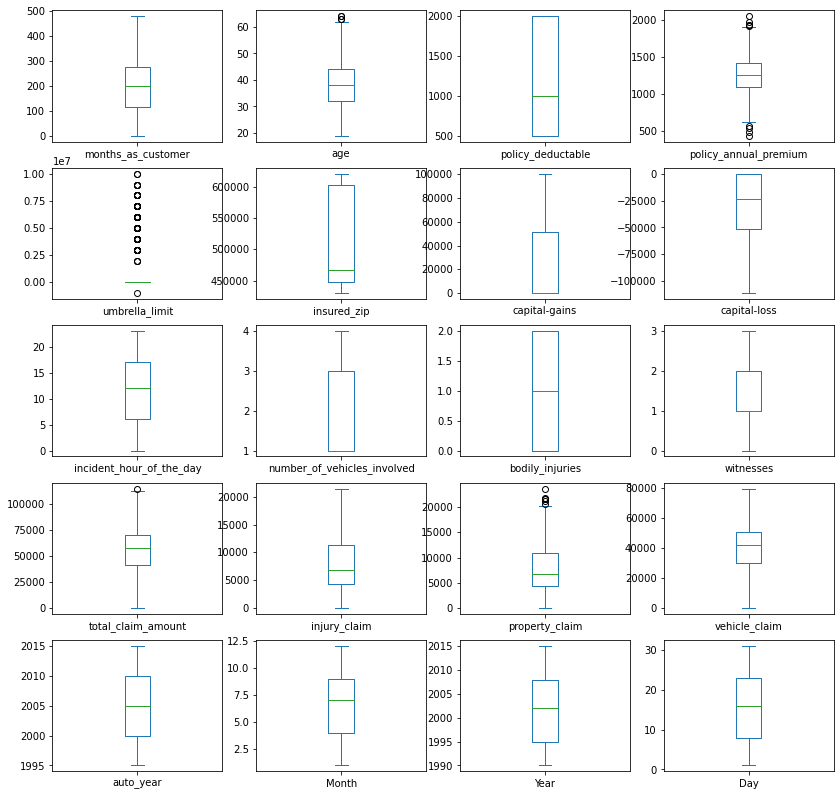

In [47]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(14,14))
plt.show()

Outliers are present in "Umbrella limit" and "property claim"

Lets treat the values.

In [48]:
df[df["property_claim"]>20000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
163,112,30,OH,500/1000,1000,1166.54,0,479852,FEMALE,Masters,...,10790,21580,75530,Dodge,Neon,1997,Y,9,2002,13
299,119,27,IN,250/500,2000,1097.64,0,614812,MALE,High School,...,7080,21240,35400,Accura,TL,2006,N,5,1997,8
301,107,31,IL,100/300,2000,1018.73,5000000,469646,MALE,Associate,...,14420,21630,57680,Honda,CRV,2001,N,11,1994,25
421,147,37,IN,250/500,1000,1306.78,0,466818,MALE,MD,...,13520,20280,47320,Toyota,Camry,1995,N,2,1992,10
500,1,29,OH,500/1000,500,854.58,0,612826,FEMALE,JD,...,7890,23670,55230,Honda,CRV,2003,N,5,2006,24
591,43,43,IL,500/1000,500,1320.39,0,604861,FEMALE,Associate,...,7270,21810,50890,Honda,CRV,1996,Y,7,1997,11
687,194,41,IL,250/500,500,1203.81,0,613119,MALE,JD,...,13700,20550,61650,Saab,95,1999,N,2,1993,15
745,258,41,IL,100/300,500,1042.25,0,601206,MALE,Masters,...,6770,20310,54160,Mercedes,C300,2008,Y,2,2001,15


i taught to replace the highest property claim of value 23670 with second highest value 21810

In [49]:
df.loc[(df["vehicle_claim"] == 55230 )& (df['property_claim']==23670), 'property_claim']=21810

In [50]:
df[df["umbrella_limit"]>6000000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
31,166,37,IL,100/300,2000,1337.28,8000000,610393,MALE,JD,...,7460,7460,52220,Ford,F150,2006,Y,6,2008,19
48,175,34,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,PhD,...,810,810,5670,Volkswagen,Passat,1995,N,7,2008,1
50,430,59,OH,250/500,2000,1326.62,7000000,477310,MALE,MD,...,16360,8180,57260,Nissan,Pathfinder,1998,N,10,2004,1
66,107,31,IN,250/500,500,1239.22,7000000,476458,FEMALE,High School,...,13800,13800,62100,Audi,A5,2009,Y,8,2011,17
88,31,36,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,College,...,940,470,3290,Dodge,Neon,2002,N,8,1999,15
115,258,46,IN,100/300,1000,1110.37,10000000,455365,MALE,MD,...,4770,9540,33390,Accura,MDX,1997,Y,9,1999,3
119,245,39,OH,250/500,500,964.79,8000000,460675,FEMALE,Associate,...,13240,6620,52960,BMW,3 Series,2010,N,4,2001,21
154,101,33,OH,100/300,1000,1053.04,7000000,619540,FEMALE,Masters,...,9040,9040,36160,Saab,93,2013,Y,6,2012,23
157,428,59,IN,250/500,500,1344.36,7000000,473329,FEMALE,JD,...,1300,650,4550,Saab,92x,2013,N,9,1999,29
161,278,48,IN,500/1000,2000,1142.62,7000000,475588,FEMALE,MD,...,11700,11700,52650,Chevrolet,Silverado,1997,N,7,1999,24


We got a lot of data. So,so We will not treat the umbrealla unit

Let's check for skewness.

# SKEWNESS

In [51]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

In [52]:
columns=['umbrella_limit','insured_zip']

In [53]:
for i in columns:
    df[i]=np.cbrt(df[i])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

Several method were used to reduce the skew but it was not working. Some methods were increasing the skew in total claim amount and vehicle claim.

We will now convert the categorical feature to nummerical using label encoder.

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

Since or data is imbalance we will now balance it using Oversampling from SMOTE.

But before that we will split the data into input and target variable.

In [56]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)

In [57]:
x.shape,y.shape

((1000, 38), (1000, 1))

In [58]:
#Importing the SMOTE library.

from imblearn.over_sampling import SMOTE

In [59]:
SM=SMOTE()
X,Y=SM.fit_resample(x,y)
y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

x_new.shape,y_new.shape

((1506, 38), (1506, 1))

<AxesSubplot:ylabel='fraud_reported'>

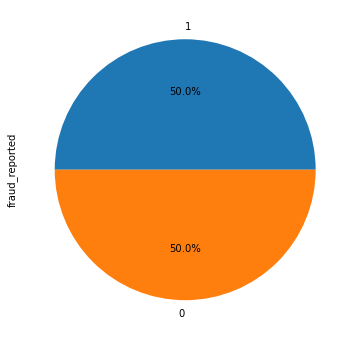

In [60]:
y_new['fraud_reported'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

From above we can observe that now our target variable is now balanced.

We will bring our data to the standard scale using Standard Scaler.

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)

In [62]:
sc_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,1.106599,1.038160,1.362660,0.232517,-0.250074,0.673147,-0.561001,-0.497268,1.256490,0.621360,...,0.658951,-0.253573,1.126740,0.691443,0.975141,-1.701622,-0.184476,1.153161,1.794077,0.187442
1,0.189715,0.348394,0.107513,0.232517,1.483243,-0.226649,1.985736,-0.464005,1.256490,0.621360,...,-2.020040,-1.480989,-1.498747,-2.039061,0.452614,-0.653194,0.351169,-0.102559,0.652598,1.378026
2,-0.672157,-1.146098,1.362660,-1.083914,1.483243,0.699881,1.985736,-1.091163,-0.795868,1.710729,...,-0.829109,0.001335,-0.840230,-0.937752,-0.592440,1.062414,0.351169,-0.102559,-0.203511,-0.765025
3,0.446442,0.233433,-1.147635,0.232517,1.483243,0.711037,2.145311,1.614897,-0.795868,1.710729,...,0.328405,-0.289988,-0.306124,0.614986,-0.853703,1.443660,1.601008,-0.416489,-1.630359,1.139909
4,0.189715,0.578316,-1.147635,1.548949,-0.250074,1.432668,2.145311,1.650187,1.256490,-1.557378,...,-1.962466,-1.369601,-1.526632,-1.980594,-1.637494,1.157726,0.708266,-0.102559,1.794077,-1.122200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-1.396495,-1.490981,-1.147635,0.232517,1.192046,0.432057,-0.561001,-0.565272,1.256490,0.621360,...,0.463200,0.132860,-0.130448,0.646075,0.452614,0.967102,0.708266,-1.672209,1.223338,-0.765025
1502,-0.076182,0.233433,-1.147635,0.232517,0.157255,0.229763,-0.561001,-0.451950,-0.795868,-1.012694,...,0.905632,-0.100628,1.061103,1.012840,0.452614,-1.034441,-1.434315,0.525301,-0.631565,-1.003142
1503,-0.452104,-0.686254,0.107513,-1.083914,1.008314,0.137926,1.521967,-0.705787,-0.795868,-0.468009,...,0.976935,-0.460284,1.021849,1.217136,0.975141,-0.081325,0.172621,-1.044349,-1.059620,0.068383
1504,-0.965560,-0.916176,-1.147635,0.232517,-0.733670,-0.093599,0.637795,0.470904,-0.795868,-0.468009,...,-0.405117,-0.188668,-0.204665,-0.462542,0.191350,-1.225064,-1.255767,1.153161,1.366023,1.020850


From co-relation heatmap we have understood that most of the features are co related to each other hence we will use PCA to avoid multi colinearity.

# PCA

In [63]:
#Importing the libraries for PCA.

from sklearn.decomposition import PCA

In [64]:
testPCA=PCA()
Y=testPCA.fit(sc_x)

Checking the cumulative sum of the expalined variance ratio.

In [65]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.22870817,  15.52553193,  20.08711126,  24.27117862,
        27.81539118,  31.08404735,  34.32477851,  37.46415197,
        40.56473071,  43.57739707,  46.52837649,  49.41571726,
        52.26121243,  55.04884086,  57.77262473,  60.47110929,
        63.15178162,  65.71941581,  68.19353047,  70.62200915,
        73.00192026,  75.34283938,  77.62077844,  79.88633727,
        82.10575481,  84.28142759,  86.38943306,  88.39335969,
        90.33039872,  92.25209085,  94.14605704,  95.96990647,
        97.64470533,  98.8316937 ,  99.42826348,  99.81668541,
        99.99999404, 100.        ])

The above variance shows the number of components against the data we will get. We take 33 components with 97.64% variance ratio

In [76]:
FinalPCA=PCA(n_components=33)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

finalx

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.195148,1.062708,-0.205514,3.028756,2.543148,1.522141,0.990876,-1.088758,-0.356479,-0.328881,...,-0.531038,-1.425047,-0.383407,-0.032487,-1.920140,0.715994,-0.608471,-0.678941,-0.564129,-0.329232
1,-4.378771,0.660627,-0.169187,1.164919,-0.098905,0.800481,0.567778,0.023914,0.394431,-0.602634,...,-0.091700,-0.211715,-0.821156,-0.550593,0.246000,0.961055,-0.734138,-0.076563,-0.838687,-0.618862
2,-0.971199,-0.995150,1.200772,-1.047734,-2.036584,0.335644,-0.810070,-0.106292,0.640878,0.381764,...,1.150608,0.191040,0.144001,-1.411734,-0.921912,-1.136030,-0.380341,1.341030,1.066729,-1.123803
3,0.050271,1.504811,-1.103880,-2.412963,-2.494506,2.384006,-2.210781,-0.498748,-1.036359,0.579412,...,-1.980820,-0.119437,0.993722,0.403593,-0.905983,-0.577841,0.517206,0.137910,0.913110,-0.781883
4,-3.389458,1.808482,-0.315912,-2.249372,-1.604659,-0.009436,0.457340,-0.337541,-0.234502,2.119280,...,-1.607729,0.901257,1.206246,1.880358,0.179008,1.536499,1.199149,0.430846,-0.815627,-0.169236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.422541,-2.356487,1.213535,0.367491,-1.594367,1.172264,-1.688585,0.107104,0.036170,-0.390500,...,-0.319885,0.670838,0.142244,-0.022464,-0.445119,0.349537,-1.820986,-1.027492,-0.638554,0.347203
1502,1.398580,0.058296,-2.103442,-1.162761,1.546026,-1.191800,-1.192830,0.394032,-1.260535,0.902242,...,-0.799171,0.017640,0.056397,-0.211963,-1.267162,-0.173764,-1.259107,-0.838686,-0.509093,0.538449
1503,0.721598,-0.222272,-1.900034,-0.577941,-1.116429,1.227857,1.304411,1.482056,-0.538458,-0.187465,...,0.065481,-0.309243,-0.959488,-1.413699,-0.414316,-0.452826,-0.031126,1.169857,0.376936,0.664305
1504,-0.633136,-1.482507,-1.002037,-0.281613,1.428123,-0.174548,-0.127625,0.276333,0.325216,0.366868,...,0.242693,-0.626563,-1.139610,0.690962,-0.321351,0.650180,0.928454,0.622143,-0.918443,-0.518975


This is our final dataset after the PCA. I will reassign x to finalx

In [77]:
x=finalx
x

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.195148,1.062708,-0.205514,3.028756,2.543148,1.522141,0.990876,-1.088758,-0.356479,-0.328881,...,-0.531038,-1.425047,-0.383407,-0.032487,-1.920140,0.715994,-0.608471,-0.678941,-0.564129,-0.329232
1,-4.378771,0.660627,-0.169187,1.164919,-0.098905,0.800481,0.567778,0.023914,0.394431,-0.602634,...,-0.091700,-0.211715,-0.821156,-0.550593,0.246000,0.961055,-0.734138,-0.076563,-0.838687,-0.618862
2,-0.971199,-0.995150,1.200772,-1.047734,-2.036584,0.335644,-0.810070,-0.106292,0.640878,0.381764,...,1.150608,0.191040,0.144001,-1.411734,-0.921912,-1.136030,-0.380341,1.341030,1.066729,-1.123803
3,0.050271,1.504811,-1.103880,-2.412963,-2.494506,2.384006,-2.210781,-0.498748,-1.036359,0.579412,...,-1.980820,-0.119437,0.993722,0.403593,-0.905983,-0.577841,0.517206,0.137910,0.913110,-0.781883
4,-3.389458,1.808482,-0.315912,-2.249372,-1.604659,-0.009436,0.457340,-0.337541,-0.234502,2.119280,...,-1.607729,0.901257,1.206246,1.880358,0.179008,1.536499,1.199149,0.430846,-0.815627,-0.169236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.422541,-2.356487,1.213535,0.367491,-1.594367,1.172264,-1.688585,0.107104,0.036170,-0.390500,...,-0.319885,0.670838,0.142244,-0.022464,-0.445119,0.349537,-1.820986,-1.027492,-0.638554,0.347203
1502,1.398580,0.058296,-2.103442,-1.162761,1.546026,-1.191800,-1.192830,0.394032,-1.260535,0.902242,...,-0.799171,0.017640,0.056397,-0.211963,-1.267162,-0.173764,-1.259107,-0.838686,-0.509093,0.538449
1503,0.721598,-0.222272,-1.900034,-0.577941,-1.116429,1.227857,1.304411,1.482056,-0.538458,-0.187465,...,0.065481,-0.309243,-0.959488,-1.413699,-0.414316,-0.452826,-0.031126,1.169857,0.376936,0.664305
1504,-0.633136,-1.482507,-1.002037,-0.281613,1.428123,-0.174548,-0.127625,0.276333,0.325216,0.366868,...,0.242693,-0.626563,-1.139610,0.690962,-0.321351,0.650180,0.928454,0.622143,-0.918443,-0.518975


In [78]:
y=y_new

In [79]:
x.shape,y.shape

((1506, 33), (1506, 1))

# Model Fitting and Selection

In [80]:
#Importing the libraries for model fitting and checking the score,

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [81]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8245033112582781  on Random state 96


We can see that the best random state is 96. We will split the data with this random state.

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=96)

In [83]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8245033112582781
[[120  27]
 [ 26 129]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       147
           1       0.83      0.83      0.83       155

    accuracy                           0.82       302
   macro avg       0.82      0.82      0.82       302
weighted avg       0.82      0.82      0.82       302

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8708609271523179
[[126  21]
 [ 18 137]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       147
           1       0.87      0.88      0.88       155

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302

-------------------------------------------------------------------------------------------

From above we can observe that SVC and RandomForest has performed well with 87% and 86% accuracy.

# Cross Validation

We will check the Underfitting or Overfitting of the model using Cross Validation

In [84]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7617060130690193
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.822837781346945
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.6773272315240588
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8148687597632615
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7251655629139073
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7962729092869243
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7710127389936414
-------------------------------------------------------------------------------


# SVC is the only model with above 82% score on Cross validation

# RFC  has given us the least difference on test and CV score. Test accuracy 86% and Cv score of 81%

We will check the ROC_AUC score to pick the final model

# ROC_AUC score

Lets see all our model performance

AUC Score of  AdaBoostClassifier(n_estimators=100)
0.817138468290542




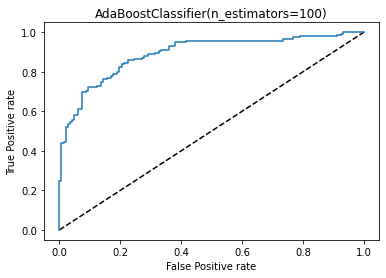

----------------------------------------


In [88]:
# checkinga 
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob=m.predict_proba(x_test)[:,1]
fpr,tpr,thesholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,m.predict(x_test))
print('AUC Score of ',m)
print(auc_score)
print('\n')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=m)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(m)
plt.show()
print(20*'--')

In [90]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc_score}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.824503,0.761706,0.817138
1,SVC,0.870861,0.822838,0.817138
2,KNeighborsClassifier,0.675497,0.677327,0.817138
3,RandomForestClassifier,0.864238,0.814869,0.817138
4,DecisionTreeClassifier,0.695364,0.725166,0.817138
5,GaussianNB,0.844371,0.796273,0.817138
6,AdaBoostClassifier,0.817881,0.771013,0.817138


We can conclude that SVC and RFC has performed well with less overfitting and underfitting.

Lets Hypertune the model to check if we can improve the accuracy.

# HyperTuning

Hypertuning of RFC

We will import GridSearch to hypertune the model

In [91]:
from sklearn.model_selection import GridSearchCV

Lets check the base parameters of the model

In [92]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [93]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50,100],
             'criterion':['gini', 'entropy']}

In [94]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

Now we will fit the model to check the accuracy

Random Forest classifier Performance after HyperTuning
-----------------------------------------------
Accuracy Score 87.08609271523179
Cross Validation Score 81.28534025654002
AUC ROC Score 87.10335747202107


AUC ROC Curve with Final Mod


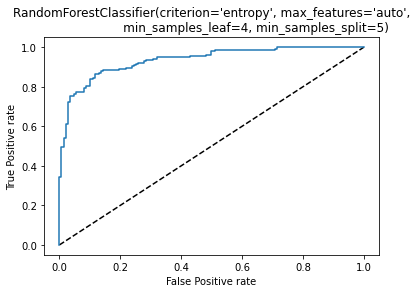

In [95]:
Finalmod=RandomForestClassifier(max_features= 'auto', min_samples_leaf= 4, min_samples_split=5,n_estimators=100,max_depth=None,criterion='entropy')
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

# We got the accuracy of 87% with the CV score of 81% and AUC ROC score of 87%

We will save this as our final model.

In [97]:
import joblib
joblib.dump(Finalmod,'Insurance Claims- Fraud Detection.obj')

['Insurance Claims- Fraud Detection.obj']